Bayesian Statistics Made Simple
===

Code and exercises from my workshop on Bayesian statistics in Python.

Copyright 2016 Allen Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
from __future__ import print_function, division

import math
import numpy as np
from scipy.special import gamma

from thinkbayes2 import Pmf, Suite
import thinkplot

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Working with Pmfs
---
Create a Pmf object to represent a six-sided die.

In [2]:
d6 = Pmf()

A Pmf is a map from possible outcomes to their probabilities.

In [3]:
for x in [1,2,3,4,5,6]:
    d6[x] = 1

Initially the probabilities don't add up to 1.

In [4]:
d6.Print()

1 1
2 1
3 1
4 1
5 1
6 1


`Normalize` adds up the probabilities and divides through.  The return value is the total probability before normalizing.

In [5]:
d6.Normalize()

6

Now the Pmf is normalized.

In [6]:
d6.Print()

1 0.16666666666666666
2 0.16666666666666666
3 0.16666666666666666
4 0.16666666666666666
5 0.16666666666666666
6 0.16666666666666666


And we can compute its mean (which only works if it's normalized).

In [7]:
d6.Mean()

3.5

`Random` chooses a random value from the Pmf.

In [10]:
d6.Random()

6

`thinkplot` provides methods for plotting Pmfs in a few different styles.

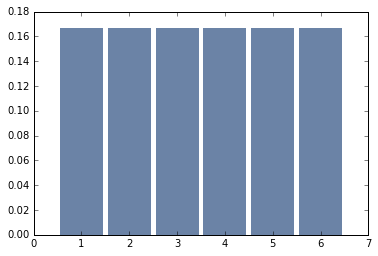

In [11]:
thinkplot.Hist(d6)

**Exercise:**  The Pmf object provides `__add__`, so you can use the `+` operator to compute the Pmf of the sum of two dice.

Compute and plot the Pmf of the sum of two 6-sided dice.

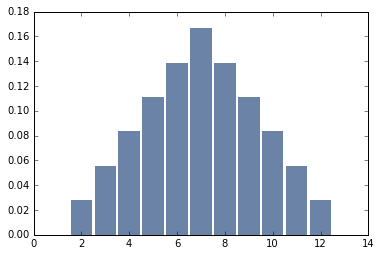

In [13]:
# Solution goes here
d6_1 = Pmf()
d6_2 = Pmf()

for x in [1,2,3,4,5,6]:
    d6_1[x] = 1
    d6_2[x] = 1

d6_1.Normalize()
d6_2.Normalize()

cmbd = d6_1 + d6_2

thinkplot.Hist(cmbd)

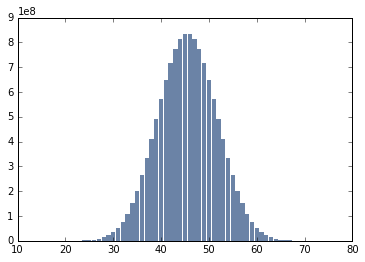

In [15]:
cmbd = d6 + d6 + d6 + d6 + d6 + d6 + d6 + d6 + d6 + d6 + d6 + d6 + d6
thinkplot.Hist(cmbd)

**Exercise:** Suppose I roll two dice and tell you the result is greater than 3.

Plot the Pmf of the remaining possible outcomes and compute its mean.

In [ ]:
# Solution goes here

The cookie problem
---
Create a Pmf with two equally-likely hypotheses.


In [16]:
cookie = Pmf(['Bowl 1', 'Bowl 2'])
cookie.Print()

Bowl 1 0.5
Bowl 2 0.5


Update each hypothesis with the likelihood of the data (a vanilla cookie).

p(

In [17]:
cookie['Bowl 1'] *= 0.75  # likelihood of data from bowl 1
cookie['Bowl 2'] *= 0.5
cookie.Normalize()

0.625

Print the posterior probabilities.

In [18]:
cookie.Print()

Bowl 1 0.6000000000000001
Bowl 2 0.4


probability of getting a vanilla cookie from the bowls

**Exercise:** Suppose we put the first cookie back, stir, choose again from the same bowl, and get a chocolate cookie.

Hint: The posterior (after the first cookie) becomes the prior (before the second cookie).

In [19]:
# Solution goes here
cookie['Bowl 1'] *= 0.25
cookie['Bowl 2'] *= 0.5
cookie.Normalize()
cookie.Print()

Bowl 1 0.4285714285714286
Bowl 2 0.5714285714285714


See 1 Vanilla cookie, thought ~60% cookie from bowl 1. Next we see chocolate cookie, and chocolate cookie makes us think we are taking cookies from bowl 2 not bowl 1.

**Exercise:** Instead of doing two updates, what if we collapse the two pieces of data into one update?

Re-initialize `Pmf` with two equally-likely hypotheses and perform one update based on two pieces of data, a vanilla cookie and a chocolate cookie.

The result should be the same regardless of how many updates you do (or the order of updates).

In [20]:
# Solution goes here
cookie = Pmf(['Bowl 1', 'Bowl 2'])
cookie.Print()
# Solution goes here
cookie['Bowl 1'] *= 0.25 * .75
cookie['Bowl 2'] *= 0.5 * .5
cookie.Normalize()
cookie.Print()

Bowl 1 0.5
Bowl 2 0.5
Bowl 1 0.42857142857142855
Bowl 2 0.5714285714285714


The dice problem
---
Create a Suite to represent dice with different numbers of sides.

In [21]:
suite = Suite([4, 6, 8, 12])
suite.Print()

4 0.25
6 0.25
8 0.25
12 0.25


**Exercise:** Update `suite` based on the likelihood of the data (rolling a 6), then normalize and print the results.

In [22]:
# Solution goes here
suite[4] *= 0.0 
suite[6] *= 1./6 
suite[8] *= 1./8
suite[12] *= 1./12 
suite.Normalize()
suite.Print()

4 0.0
6 0.4444444444444444
8 0.3333333333333333
12 0.2222222222222222


Now let's do the same calculation using a new class `Dice` that extends `Suite`.  `Dice` inherits `Update` and provides `Likelihood`.

**Exercise:**  Fill in the body of `Likelihood` to compute the probability of the data (the outcome of rolling the die) for a given hypothesis (number of sides on the die).

Hint: What should you do if the outcome exceeds the hypothetical number of sides on the die?

In [24]:
class Dice(Suite):
    def Likelihood(self, data, hypo):
        like = 1./hypo if data <= hypo else 0.0
        return like

Now we can create a `Dice` object and update it.

In [25]:
dice = Dice([4, 6, 8, 12])
dice.Update(6)
dice.Print()

4 0.0
6 0.4444444444444444
8 0.3333333333333333
12 0.2222222222222222


If we get more data, we can perform more updates.

In [26]:
for roll in [8, 7, 7, 5, 4]:
    dice.Update(roll)

Here are the results.

In [27]:
dice.Print()

4 0.0
6 0.0
8 0.9192938209331653
12 0.08070617906683478


The German tank problem
---
The German tank problem is actually identical to the dice problem.

In [28]:
class Tank(Suite):
    # hypo is the number of tanks
    # data is an observed serial number
    def Likelihood(self, data, hypo):
        if data > hypo:
            return 0
        else:
            return 1 / hypo

Here are the posterior probabilities after seeing Tank #37.

62.822944785168964

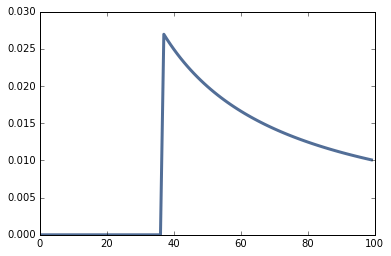

In [29]:
tank = Tank(range(100))
tank.Update(37) # if capture tank 37 how many tanks do we think they have in total?
thinkplot.Pdf(tank)
tank.Mean()

**Exercise:**  Suppose we see another tank with serial number 17.  What effect does this have on the posterior probabilities?

Update the suite again with the new data and plot the results.

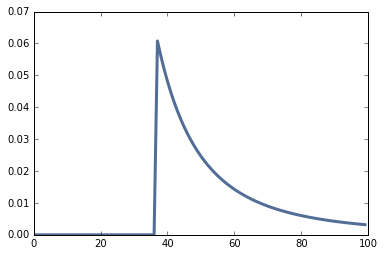

In [30]:
# Solution goes here
for new_tank in [17, 36]:
    tank.Update(new_tank)
thinkplot.Pdf(tank)

The Euro problem
---

**Exercise:**  Write a class definition for `Euro`, which extends `Suite` and defines a likelihood function that computes the probability of the data (heads or tails) for a given value of `x` (the probability of heads).

Note that `hypo` is in the range 0 to 100.

In [56]:
# Solution goes here
class Euro(Suite):
    def Likelihood(self, data, hypo):
        x = hypo/100.
        like = x if data == 'H' else 1-x
        return like

We'll start with a uniform distribution from 0 to 100.

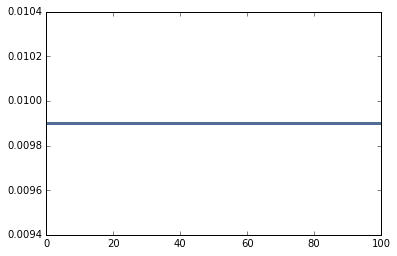

In [57]:
euro = Euro(range(101))
thinkplot.Pdf(euro)

Now we can update with a single heads:

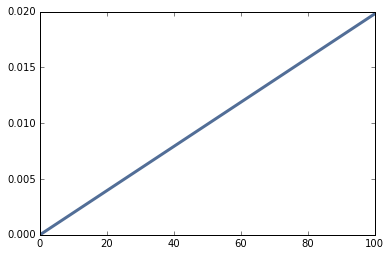

In [58]:
euro.Update('H')
thinkplot.Pdf(euro)

Another heads:

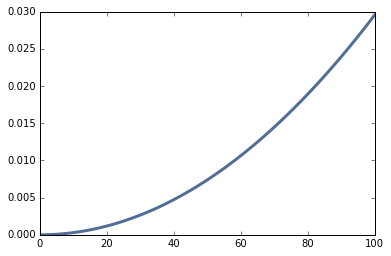

In [59]:
euro.Update('H')
thinkplot.Pdf(euro)

And a tails:

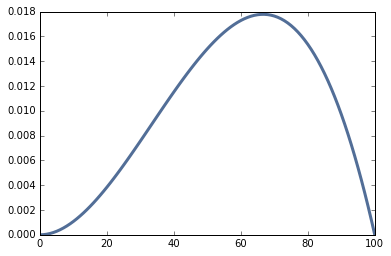

In [60]:
euro.Update('T')
thinkplot.Pdf(euro)

most likely value is at 2./3. given that we saw 2 heads and 1 tail. tells us range of values and the distribution of x that is likely

Starting over, here's what it looks like after 7 heads and 3 tails.

70

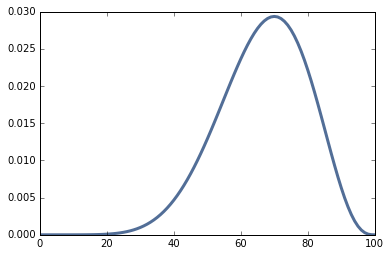

In [61]:
euro = Euro(range(101))

for outcome in 'HHHHHHHTTT':
    euro.Update(outcome)

thinkplot.Pdf(euro)
euro.MaximumLikelihood()

The maximum posterior probability is 70%, which is the observed proportion.

Here are the posterior probabilities after 140 heads and 110 tails.

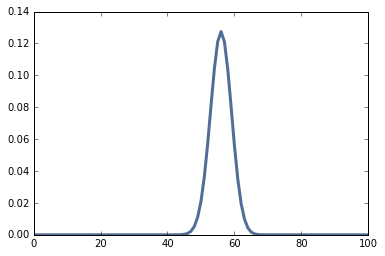

In [62]:
euro = Euro(range(101))

evidence = 'H' * 140 + 'T' * 110
for outcome in evidence:
    euro.Update(outcome)
    
thinkplot.Pdf(euro)

The posterior mean s about 56%

In [63]:
euro.Mean()

55.952380952380956

So is the value with maximum posterior probability.

In [64]:
euro.MaximumLikelihood()

56

The posterior credible interval has a 90% chance of containing the true value (provided that the prior distribution truly represents our background knowledge).

In [65]:
euro.CredibleInterval(90)

(51, 61)

The World Cup Problem
---
We'll use λ to represent the hypothetical goal-scoring rate in goals per game.

To compute prior probabilities for values of λ, we'll use a Gamma distribution.

In [ ]:
def EvalGammaPdf(lam, a):
    """Computes the Gamma PDF.

    lam: where to evaluate the PDF
    a: parameter of the gamma distribution

    returns: float probability
    """
    return lam**(a-1) * math.exp(-lam) / gamma(a)

`MakeGammaPmf` takes a list of hypothetical rates and returns a Pmf object.

In [ ]:
def MakeGammaPmf(lams, a):
    """Makes a PMF discrete approx to a Gamma distribution.

    lam: parameter lambda in events per unit time
    xs: upper bound of the Pmf

    returns: normalized Pmf
    """
    pmf = Pmf()
    for lam in lams:
        pmf[lam] = EvalGammaPdf(lam, a)
        
    pmf.Normalize()
    return pmf

Here's what the prior looks like.  I chose the parameter to yield a mean close to 1.3, which is the average number of goals per team per game in World Cup play.

In [ ]:
xs = np.linspace(0, 8, 101)
pmf = MakeGammaPmf(xs, 1.3)
thinkplot.Pdf(pmf)
thinkplot.Config(xlabel='Goals per game')
pmf.Mean()

**Exercise:**  Write a class called `Soccer` that extends `Suite` and defines `Likelihood`, which should compute the probability of the data (the time between goals in minutes) for a hypothetical goal-scoring rate, `lam`, in goals per game.

Hint: For a given value of `lam`, the time between goals is distributed exponentially.

In [ ]:
# Solution goes here

Now we can create a `Soccer` object and initialize it with the prior Pmf:

In [ ]:
soccer = Soccer(pmf)
thinkplot.Pdf(soccer)
thinkplot.Config(xlabel='Goals per game')
soccer.Mean()

Here's the update after first goal at 11 minutes.

In [ ]:
thinkplot.Pdf(soccer, color='0.7')
soccer.Update(11)
thinkplot.Pdf(soccer)
thinkplot.Config(xlabel='Goals per game')
soccer.Mean()

Here's the update after the second goal at 23 minutes (the time between first and second goals is 12 minutes).


In [ ]:
thinkplot.Pdf(soccer, color='0.7')
soccer.Update(12)
thinkplot.Pdf(soccer)
thinkplot.Config(xlabel='Goals per game')
soccer.Mean()

This distribution represents our belief about `lam` after two goals.

Now to predict the number of goals in the remaining 67 minutes.

The distribution of additional goals (after the first two) is Poisson, with a parameter that is the product of `lam` and the remaining time (in games).

In [ ]:
def EvalPoissonPmf(k, lam):
    """Computes the Poisson PMF.

    k: number of events
    lam: parameter lambda in events per unit time

    returns: float probability
    """
    return lam ** k * math.exp(-lam) / gamma(k+1)

`MakePoissonPmf` makes a Pmf that represents a Poisson distribution.

In [ ]:
def MakePoissonPmf(lam, high, step=1):
    """Makes a PMF discrete approx to a Poisson distribution.

    lam: parameter lambda in events per unit time
    high: upper bound of the Pmf

    returns: normalized Pmf
    """
    pmf = Pmf()
    for k in range(0, high + 1, step):
        p = EvalPoissonPmf(k, lam)
        pmf[k] = p
    pmf.Normalize()
    return pmf

If we assume that `lam` is the mean of the posterior, we can generate a predictive distribution for the number of goals in the remainder of the game.

In [ ]:
lam = soccer.Mean()
rem_time = 90 - 23
lt = lam * rem_time / 90
pred = MakePoissonPmf(lt, 10)
thinkplot.Hist(pred)
thinkplot.Config(xlabel='Expected goals', xlim=[-0.5, 10.5])

The predictive mean is about 2 goals.

In [ ]:
pred.Mean()

And the chance of scoring 5 more goals is still small.

In [ ]:
pred.ProbGreater(4)

But that answer is only approximate because it does not take into account our uncertainty about `lam`.

The correct method is to compute a weighted mixture of Poisson distributions, one for each possible value of `lam`.

The following figure shows the different predictive distributions for the different values of `lam`.

In [ ]:
for lam, prob in soccer.Items():
    lt = lam * rem_time / 90
    pred = MakePoissonPmf(lt, 14)
    linewidth = math.sqrt(prob * 100)
    thinkplot.Pdf(pred, color='gray', alpha=0.3, linewidth=0.5)

thinkplot.Config(xlabel='Expected goals')

We can compute the mixture of these distributions by making a Meta-Pmf that maps from each Poisson Pmf to its probability.

In [ ]:
metapmf = Pmf()

for lam, prob in soccer.Items():
    lt = lam * rem_time / 90
    pred = MakePoissonPmf(lt, 15)
    metapmf[pred] = prob

`MakeMixture` takes a Meta-Pmf (a Pmf that contains Pmfs) and returns a single Pmf that represents the weighted mixture of distributions:

In [ ]:
def MakeMixture(metapmf, label='mix'):
    """Make a mixture distribution.

    Args:
      metapmf: Pmf that maps from Pmfs to probs.
      label: string label for the new Pmf.

    Returns: Pmf object.
    """
    mix = Pmf(label=label)
    for pmf, p1 in metapmf.Items():
        for x, p2 in pmf.Items():
            mix[x] += p1 * p2
    return mix

Here's the result for the World Cup problem.

In [ ]:
mix = MakeMixture(metapmf)

And here's what the mixture looks like.

In [ ]:
thinkplot.Hist(mix)
thinkplot.Config(xlabel='Expected goals', xlim=[-0.5, 10.5])

**Exercise:** Compute the predictive mean and the probability of scoring 5 or more additional goals.

In [ ]:
# Solution goes here